<a href="https://colab.research.google.com/github/Fame2875/Employee-Attrition-Prediction/blob/main/IBM_HR_Employees_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

67016018 ชนสรณ์ จึงมาริศกุล

Dataset จาก :https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

Target คือ มองหาพนักงานที่มีแนวโน้มในการลาออกจากงาน

โดยจะทำการลองใช้โมเดลทำนาย 4 โมเดลด้วยกันก็คือ  RandomForestClassifier,DecisionTreeClassifier,Logistic Regression, KNN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dataset



In [ ]:
CSV_PATH = "https://raw.githubusercontent.com/Fame2875/Employee-Attrition-Prediction/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [ ]:
df = pd.read_csv(CSV_PATH)

In [ ]:
#make Attrition_df show all column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Data Preprocessing - analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# summary of statistical measures for numerical
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print(missing_data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# prints each unique value in each column and its frequency
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())
    print('-'*80)

Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------------------------------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------------------------------------------------------------------
JobRole
Sales Executive              326
Re

In [ ]:
# splitting the data into numeric features and categorical ones
# printing the length of each list
numeric_col =  df.select_dtypes(include=['number'])
categorial_col =  df.select_dtypes(include=['object'])
print(f"Number of numeric features = {len(numeric_col.columns)}")
print(f"Number of categorical features = {len(categorial_col.columns)}")
#detecting outliers using the inter quartile range(IQR)
features_with_outliers = []

for feature in numeric_col:
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)

    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)]

    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Number of rows in the data containing outliers in {feature}:", len(outliers))

Number of numeric features = 26
Number of categorical features = 9
Number of rows in the data containing outliers in MonthlyIncome: 114
Number of rows in the data containing outliers in NumCompaniesWorked: 52
Number of rows in the data containing outliers in PerformanceRating: 226
Number of rows in the data containing outliers in StockOptionLevel: 85
Number of rows in the data containing outliers in TotalWorkingYears: 63
Number of rows in the data containing outliers in TrainingTimesLastYear: 238
Number of rows in the data containing outliers in YearsAtCompany: 104
Number of rows in the data containing outliers in YearsInCurrentRole: 21
Number of rows in the data containing outliers in YearsSinceLastPromotion: 107
Number of rows in the data containing outliers in YearsWithCurrManager: 14


In [ ]:
# Calculate the correlation matrix for the numerical columns
corr_matrix = df[numeric_col.columns].corr()

# Create a mask to keep only the upper triangle of the correlation matrix (excluding the main diagonal)
# This avoids duplicate correlations (e.g., correlation between A and B is the same as B and A)
# and ignores the self-correlation (correlation of a variable with itself)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Apply the mask to the correlation matrix, setting values outside the upper triangle to NaN
# Then stack the matrix into a Series where the index is the pairs of variables
correlations = corr_matrix.where(mask).stack()

# Set a threshold to filter out correlations with absolute values less than 0.6
threshold = 0.6
correlations = correlations[correlations.abs() > threshold]

# Sort the filtered correlations in descending order by their absolute values
correlations = correlations.abs().sort_values(ascending=False)

# Display the resulting Series of correlations that are above the threshold
correlations

JobLevel            MonthlyIncome              0.950300
                    TotalWorkingYears          0.782208
PercentSalaryHike   PerformanceRating          0.773550
MonthlyIncome       TotalWorkingYears          0.772893
YearsAtCompany      YearsWithCurrManager       0.769212
                    YearsInCurrentRole         0.758754
YearsInCurrentRole  YearsWithCurrManager       0.714365
Age                 TotalWorkingYears          0.680381
TotalWorkingYears   YearsAtCompany             0.628133
YearsAtCompany      YearsSinceLastPromotion    0.618409
dtype: float64

Insight:


*   There is total 1470 records and 35 columns availabe in the dataset

*   Dataset นี้มีข้อมูลทั้งตัวเลขและตัวอักษร ทุก feild มีข้อมูล ไม่มีข้อมูลที่ขาดหายไป
*   Target Variable คือ **Attrition**  column ที่จะเป็นตัวสรุปในการ predict
*   ทุกคนอายุเกิน 18ปีหมด ฉะนั้นสามารถ drop column Over18 ไปได้เลย
*   เราจะ drop column EmployeeNumber ไปเลยเนื่องจากไม่จำเป็นในการ analysis
*   มีทั้งหมด 10 column ที่มี outliers
*   column บาง column มีความสัมพันธ์กันอย่างมากอาจจะเกิดปัญหา multicollinearity ซึ่งทำให้ค่าของตัวแปรในโมเดลไม่เสถียร และอาจทำให้ประสิทธิภาพของโมเดลลดลง ตัวอย่างของลักษณะที่มีความสัมพันธ์กันสูงในข้อมูลนี้ ได้แก่:
 *  JobLevel กับ MonthlyIncome (0.9503): ระดับงานที่สูงขึ้นมักสัมพันธ์กับรายได้ที่มากขึ้น
 *  JobLevel กับ TotalWorkingYears (0.7822): คนที่ทำงานมานานมักมีระดับงานที่สูงขึ้น
 *  PercentSalaryHike กับ PerformanceRating (0.7736): คนที่มีการประเมินผลงานสูงมักได้ขึ้นเงินเดือนมาก
 * YearsAtCompany กับ YearsWithCurrManager (0.7692): คนที่ทำงานนานก็มักมีเวลาทำงานกับผู้จัดการคนปัจจุบันนานขึ้น


















# Data Preprocessing - Visualization

เช็คความสัมพันธ์ Attrition กับสิ่งต่างๆ

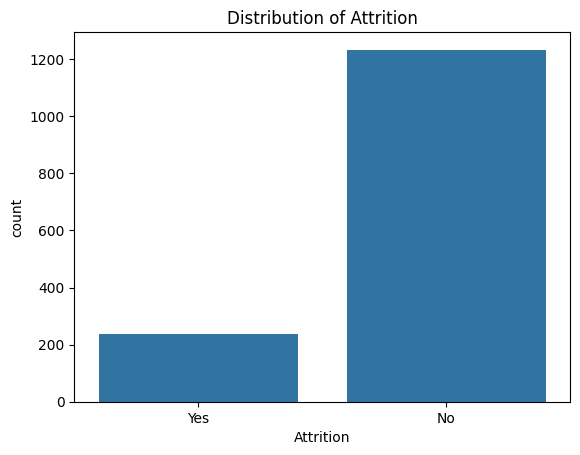

In [ ]:
# Distribution of Attrition
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition')
plt.show()



> คนที่ลาออกเทียบกับคนที่ไม่ได้ลาออกต่างกันมาก



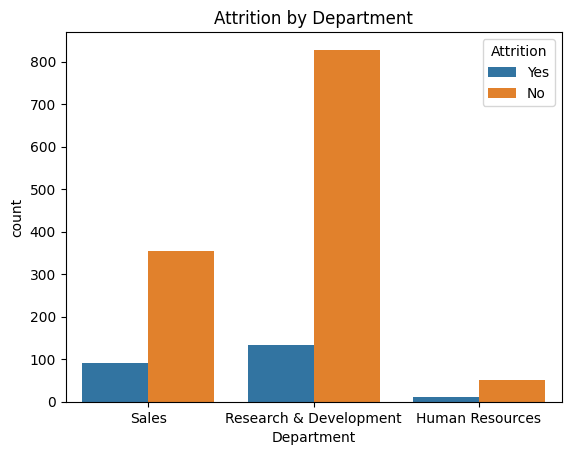

In [ ]:
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()

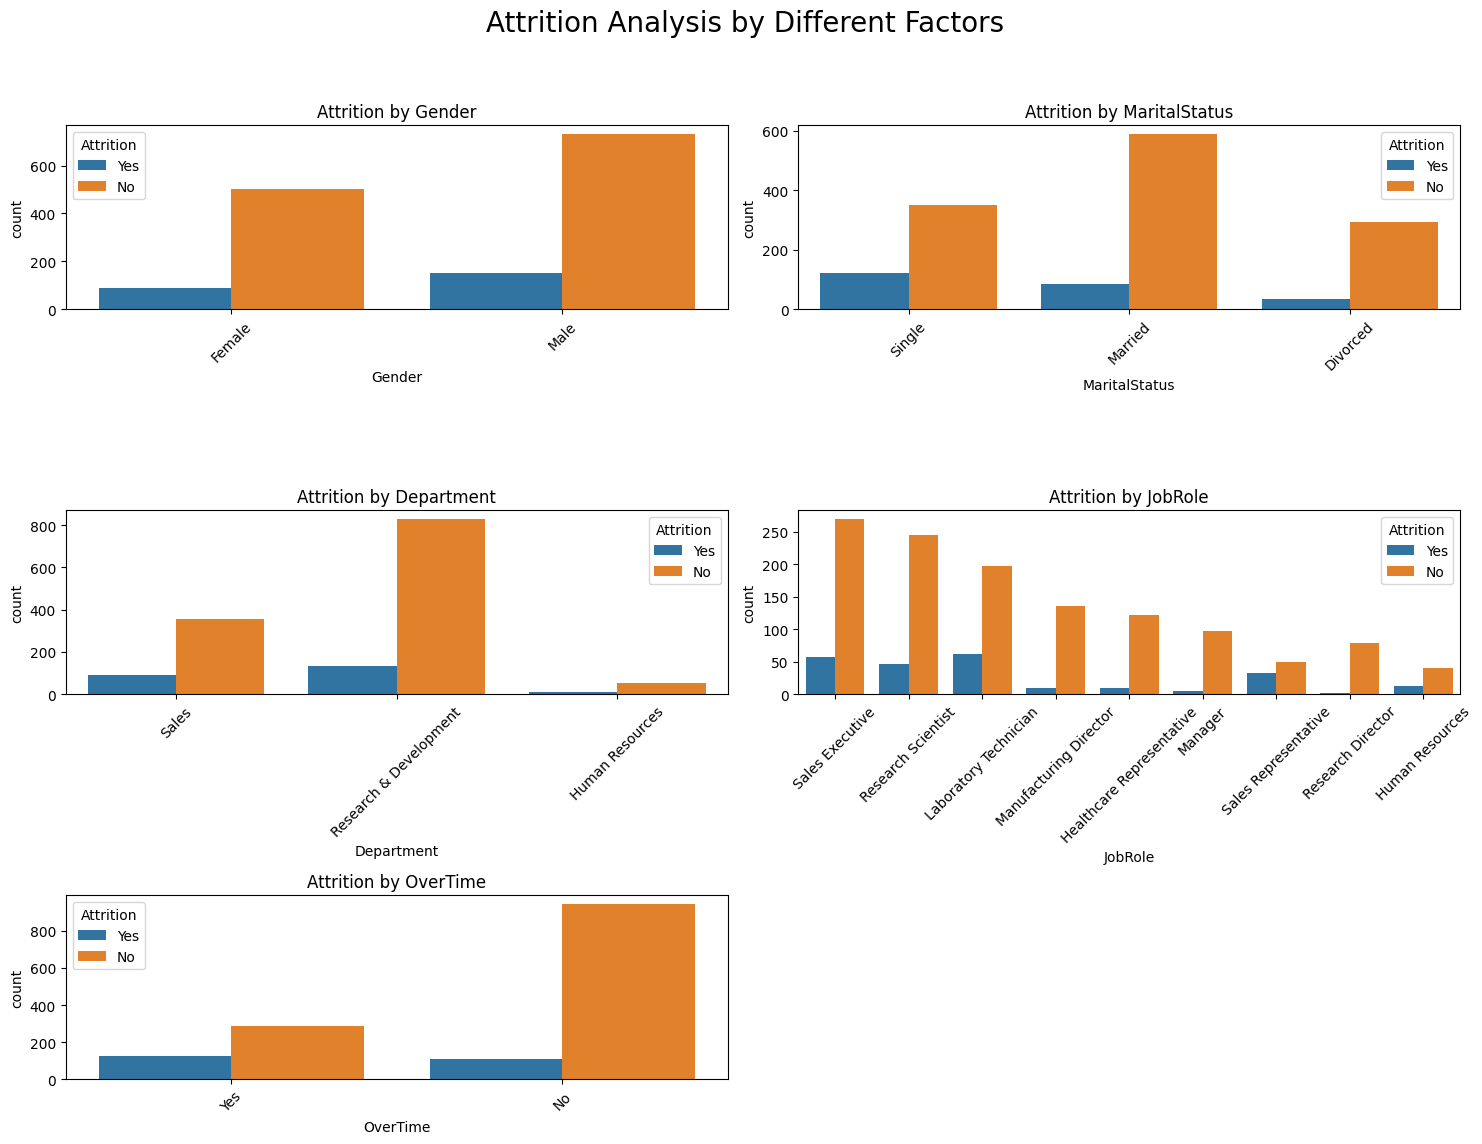

In [ ]:
# Define the list of variables to plot
variables = ['Gender', 'MaritalStatus', 'Department', 'JobRole', 'OverTime']

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))
plt.suptitle('Attrition Analysis by Different Factors', fontsize=20)

# Create a subplot for each variable
for i, var in enumerate(variables):
    plt.subplot(3, 2, i + 1)  # Adjust the layout for 3 rows and 2 columns
    sns.countplot(data=df, x=var, hue='Attrition')
    plt.title(f'Attrition by {var}')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()

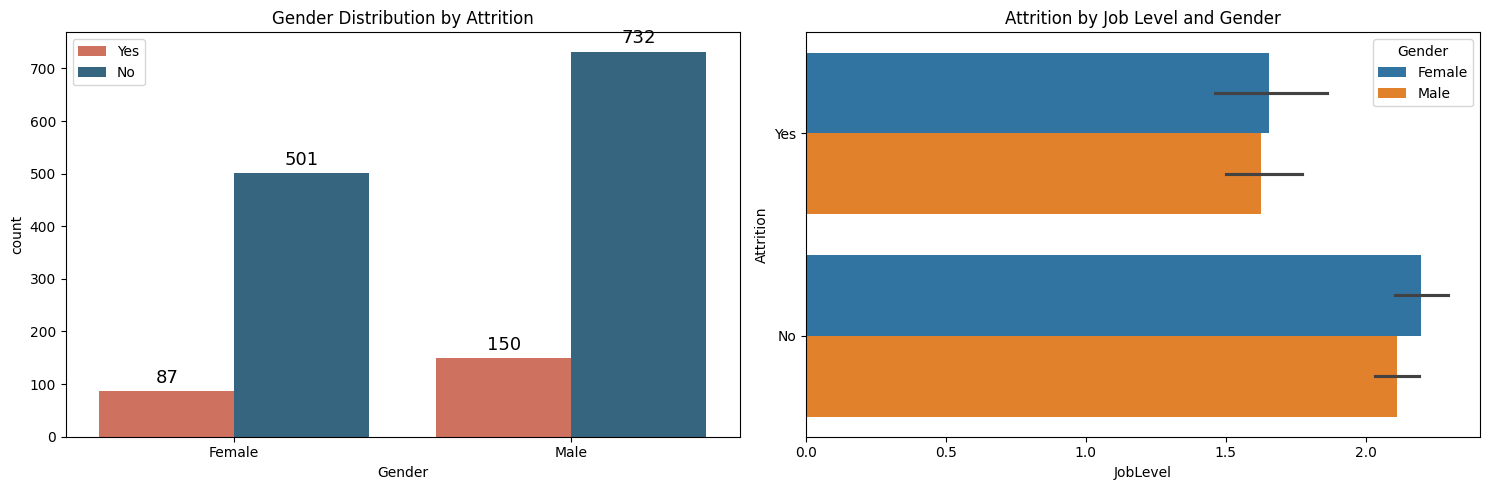

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

palette = {"Yes": "#e2644c", "No": "#2a6a8b"}

bar = sns.countplot(ax=axes[0], x='Gender', data=df, hue='Attrition',palette=palette)
axes[0].set_title('Gender Distribution by Attrition')
for container in bar.containers:
    bar.bar_label(container, labels=[f'{int(label.get_height())}' for label in container],
                  label_type='edge', color='k', fontsize=13, padding=3)
axes[0].legend(loc='upper left')

sns.barplot(ax=axes[1], x='JobLevel', y='Attrition', hue='Gender', data=df)
axes[1].set_title('Attrition by Job Level and Gender')

plt.tight_layout()
plt.show()

อัตราการลาออกของพนักงานชายอยู่ที่ประมาณ 17% เมื่อเทียบกับพนักงานหญิงที่มีอัตราการลาออก 14.7% ซึ่งชี้ให้เห็นว่าความไม่เท่าเทียมทางเพศไม่ใช่ปัจจัยสำคัญที่ส่งผลต่อการลาออก

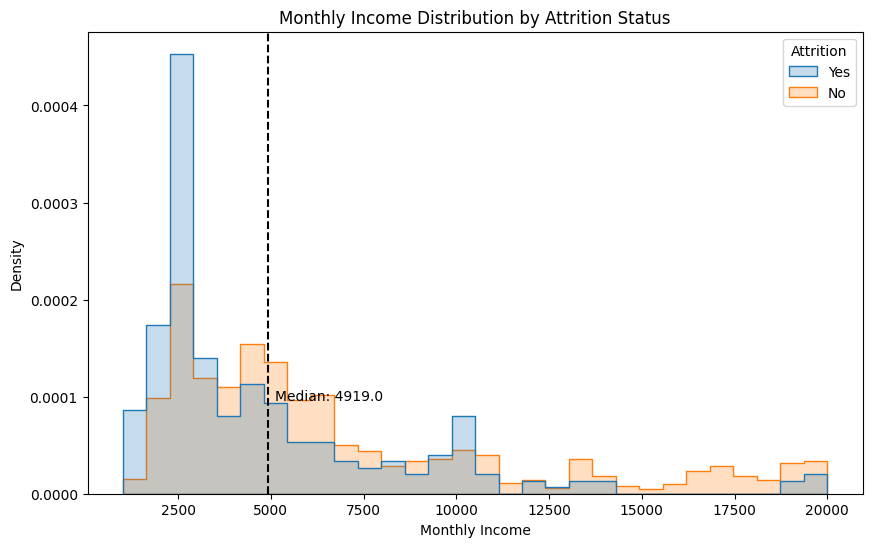

In [ ]:
#MonthlyIncome vs Attrition
# Create a new figure for plotting with a specified size (10x6 inches)
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'MonthlyIncome' column, separated by 'Attrition' status
sns.histplot(
    data=df,                      # Data source: DataFrame 'df'
    x='MonthlyIncome',            # X-axis: Monthly income values
    hue='Attrition',              # Differentiate data based on 'Attrition' status
    kde=False,                    # Do not plot a KDE line, only the histogram
    element='step',               # Draw the bars as step lines
    stat="density",               # Normalize Y-axis to show density
    common_norm=False,            # Normalize separately for each 'Attrition' category
    bins=30                       # Number of bins for the histogram
)

# Add a vertical dashed line at the median monthly income
plt.axvline(
    df['MonthlyIncome'].median(), # X position for the line: median of 'MonthlyIncome'
    color='black',                # Line color: black
    linestyle='--'                # Line style: dashed
)

# Add text annotation to show the median value
plt.text(
    df['MonthlyIncome'].median() + 200, # X position: slightly to the right of the median line
    0.0001,                             # Y position: near the bottom of the plot
    f'Median: {df["MonthlyIncome"].median()}', # Text showing the median value
    color='black',                      # Text color: black
    ha='left',                          # Horizontal alignment: left
    va='center'                         # Vertical alignment: center
)

# Set the title of the plot and the labels for the X and Y axes
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')

# Display the plot
plt.show()



*   พนักงานส่วนใหญ่อยู่ในตำแหน่งที่มีรายได้ต่ำ โดยมีเพียงส่วนน้อยที่ได้รับค่าตอบแทนสูง

*   โดยรวมแล้วกราฟแสดงให้เห็นว่ารายได้ต่อเดือนอาจเป็นปัจจัยสำคัญในการลาออกโดยระดับรายได้ที่ต่ำลงอาจส่งผลให้มีอัตราการลาออกของพนักงานสูงขึ้น



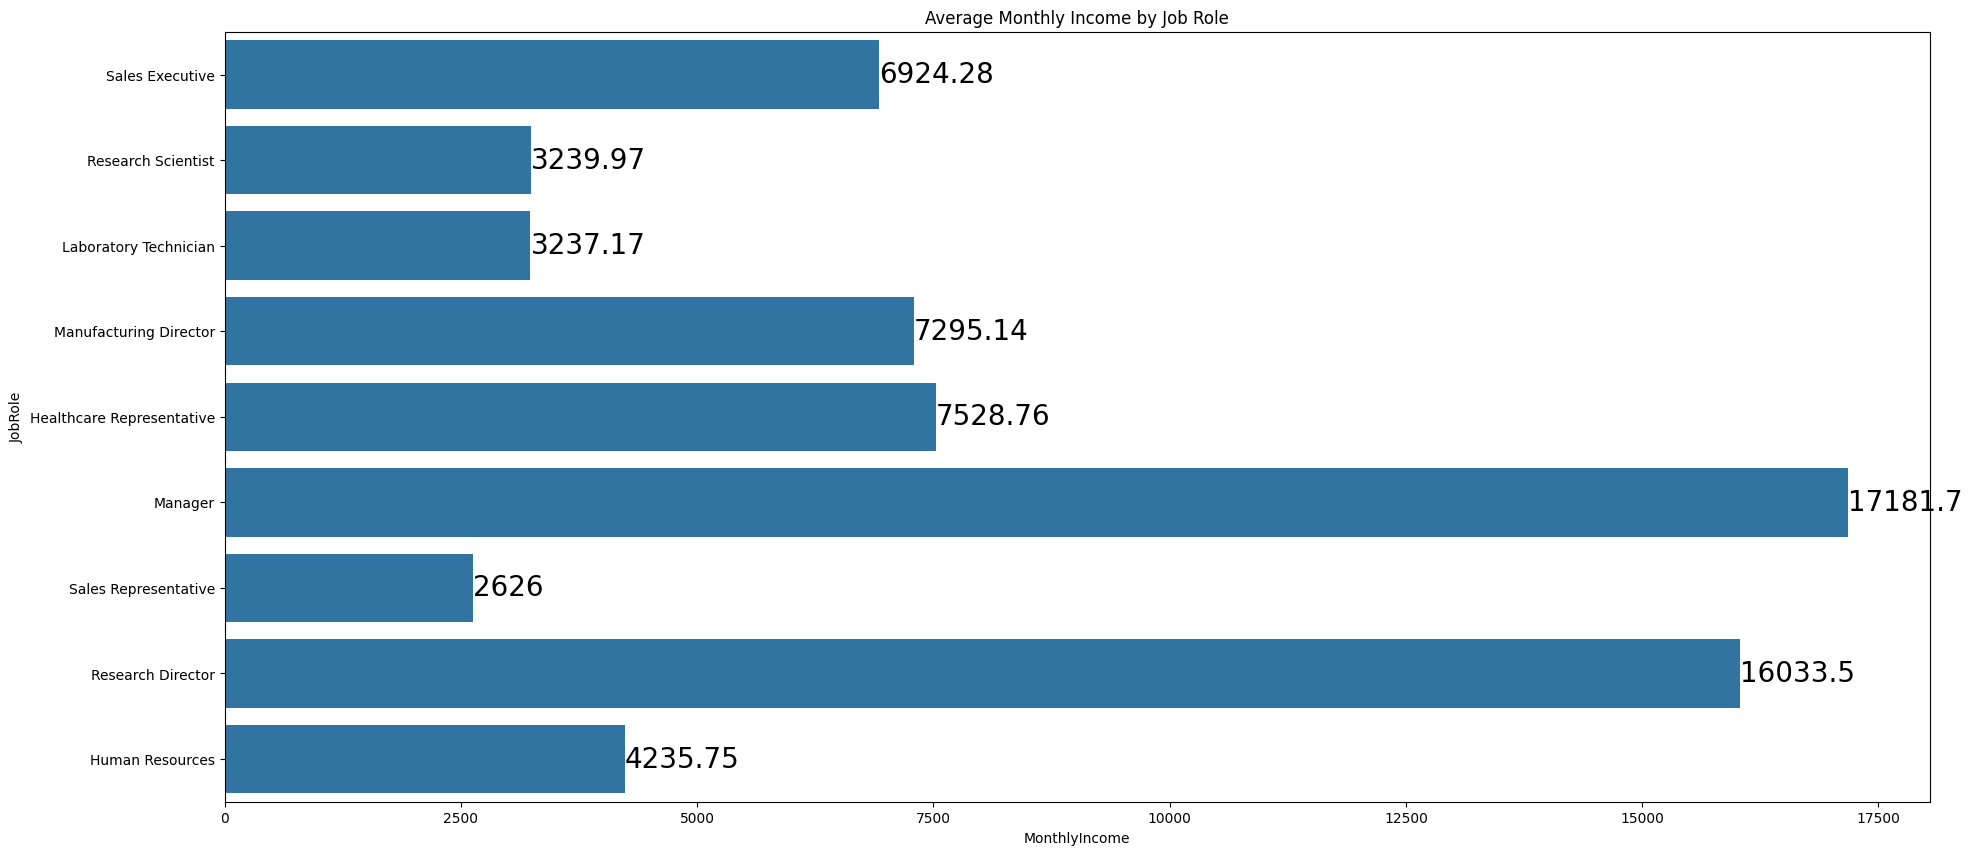

In [ ]:
# Create a new figure for plotting with a specified size (22x6 inches)
plt.figure(figsize=(22, 10))

# Create a bar plot showing the average monthly income for each job role
ax = sns.barplot(
    data=df,                   # Data source: DataFrame 'df'
    x='MonthlyIncome',         # X-axis: Monthly income values
    y='JobRole',               # Y-axis: Job roles
    estimator="mean",          # Use the mean to calculate the height of the bars
    errorbar=None              # Do not display error bars
)

# Add labels to each bar, showing the average value for each job role
ax.bar_label(ax.containers[0], fontsize=20)

# Set the title of the plot
plt.title("Average Monthly Income by Job Role")

# Display the plot
plt.show()

<ipython-input-22-e74e985e0013>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobLevel', palette='coolwarm')


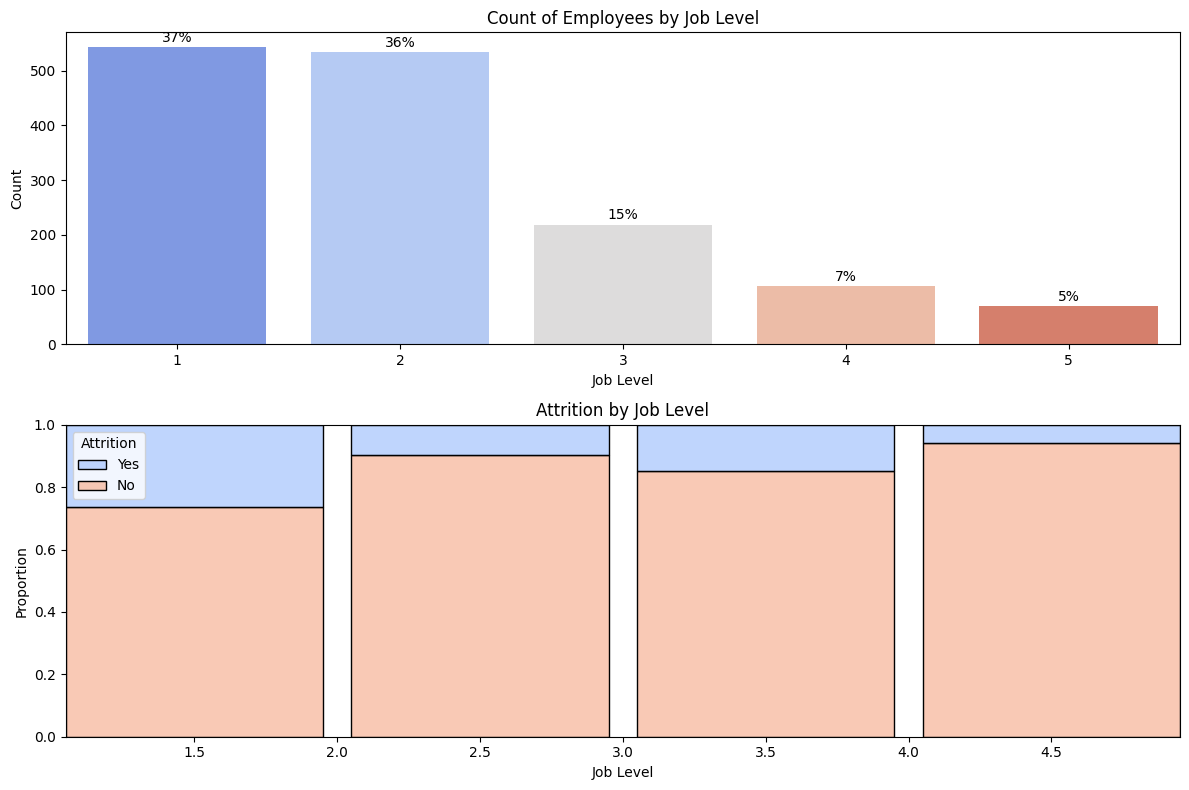

In [ ]:
plt.figure(figsize=(12, 8))

# plot 1
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='JobLevel', palette='coolwarm')
plt.title('Count of Employees by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')

# Annotate the percentage on top of bars
job_level_counts = df['JobLevel'].value_counts(normalize=True).sort_index()
for i, pct in enumerate(job_level_counts):
    plt.text(i, df['JobLevel'].value_counts().iloc[i] + 10, f'{pct:.0%}', ha='center')

# Bottom plot: Attrition by job level
plt.subplot(2, 1, 2)
sns.histplot(
    data=df, x='JobLevel', hue='Attrition', multiple='fill',
    palette='coolwarm', binwidth=1, stat='proportion',shrink=0.9
)

plt.title('Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Proportion')

# Show the plots
plt.tight_layout()
plt.show()

พนักงานส่วนใหญ่อยู่ในระดับตำแหน่งที่ 1 และ 2 แต่อัตราการลาออกนั้นเทียบเท่ากันในทุกระดับตำแหน่งแสดงให้เห็นถึงความจำเป็นในการพัฒนากลยุทธ์การรักษาพนักงานในภาพรวม

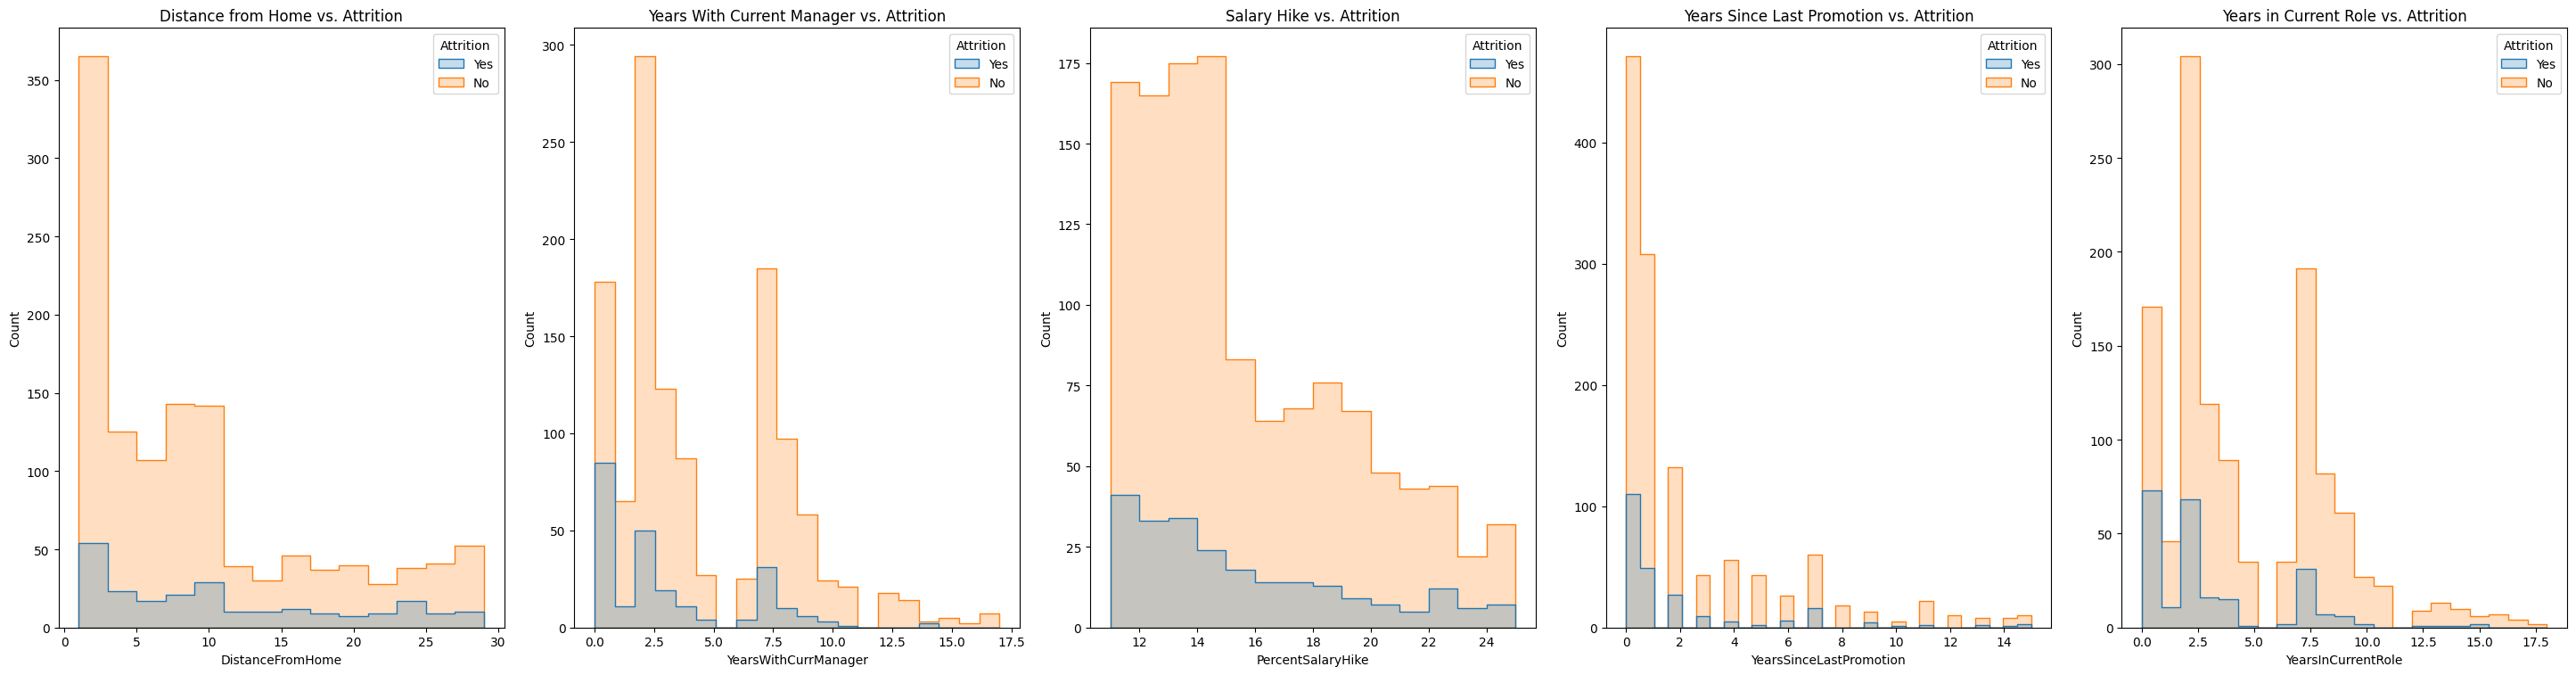

In [ ]:
# Create a 1x5 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(29, 8))

# Plot 1: Distance from Home vs. Attrition
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition', kde=False, ax=axes[0], element="step")
axes[0].set_title('Distance from Home vs. Attrition')

# Plot 2: Years With Current Manager vs. Attrition
sns.histplot(data=df, x='YearsWithCurrManager', hue='Attrition', kde=False, ax=axes[1], element="step")
axes[1].set_title('Years With Current Manager vs. Attrition')

# Plot 3: Salary Hike vs. Attrition
sns.histplot(data=df, x='PercentSalaryHike', hue='Attrition', kde=False, ax=axes[2], element="step")
axes[2].set_title('Salary Hike vs. Attrition')

# Plot 4: Years Since Last Promotion vs. Attrition
sns.histplot(data=df, x='YearsSinceLastPromotion', hue='Attrition', kde=False, ax=axes[3], element="step")
axes[3].set_title('Years Since Last Promotion vs. Attrition')

# Plot 5: Years in Current Role vs. Attrition
sns.histplot(data=df, x='YearsInCurrentRole', hue='Attrition', kde=False, ax=axes[4], element="step")
axes[4].set_title('Years in Current Role vs. Attrition')

# Adjust layout to make room for the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



*   อัตราการลาออกสูงในกลุ่มพนักงานที่ทำงานกับผู้จัดการคนปัจจุบันน้อยกว่า 3 ปี
เมื่อจำนวนปีที่ทำงานกับผู้จัดการเพิ่มขึ้น อัตราการลาออกจะลดลง แสดงให้เห็นว่าความสัมพันธ์ที่ยาวนานกับผู้จัดการอาจช่วยรักษาพนักงานไว้ได้

*   การลาออกมีแนวโน้มสูงในกลุ่มพนักงานที่ได้รับการขึ้นเงินเดือนน้อย (ประมาณ 11-15%) ซึ่งอาจบ่งชี้ถึงความไม่พอใจในด้านการเพิ่มค่าตอบแทน
*   พนักงานที่ลาออกส่วนใหญ่ไม่ได้รับการเลื่อนตำแหน่งในช่วงไม่กี่ปีที่ผ่านมา ซึ่งอาจบ่งบอกว่าการขาดการเลื่อนตำแหน่งอาจมีผลต่อการลาออก


*   การลาออกมีแนวโน้มสูงในกลุ่มพนักงานที่มีอายุงานในตำแหน่งปัจจุบันน้อยกว่า 3 ปี เมื่อพนักงานทำงานในตำแหน่งเดียวกันนานขึ้น อัตราการลาออกจะลดลง แสดงให้เห็นว่าความมั่นคงในตำแหน่งและประสบการณ์มีผลต่อการรักษาพนักงาน



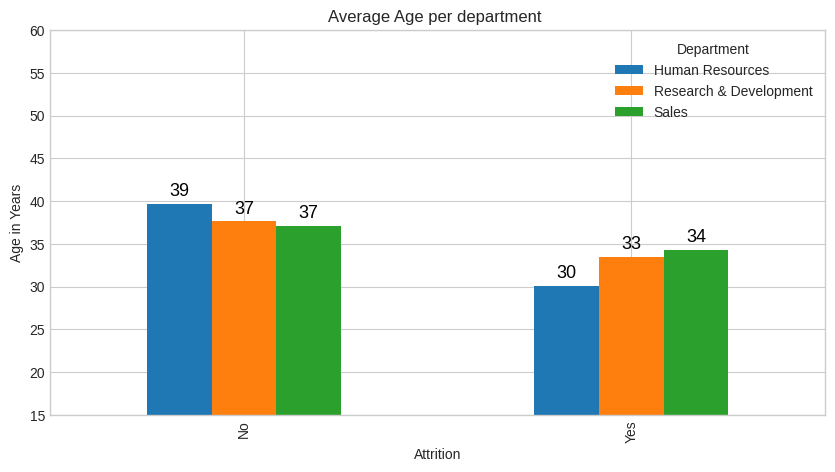

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
bar = df.groupby(['Attrition','Department'])['Age'].mean().unstack().plot(kind='bar', figsize=(10, 5))
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('Average Age per department ')
plt.ylabel('Age in Years')
plt.ylim(15,60)
plt.show()

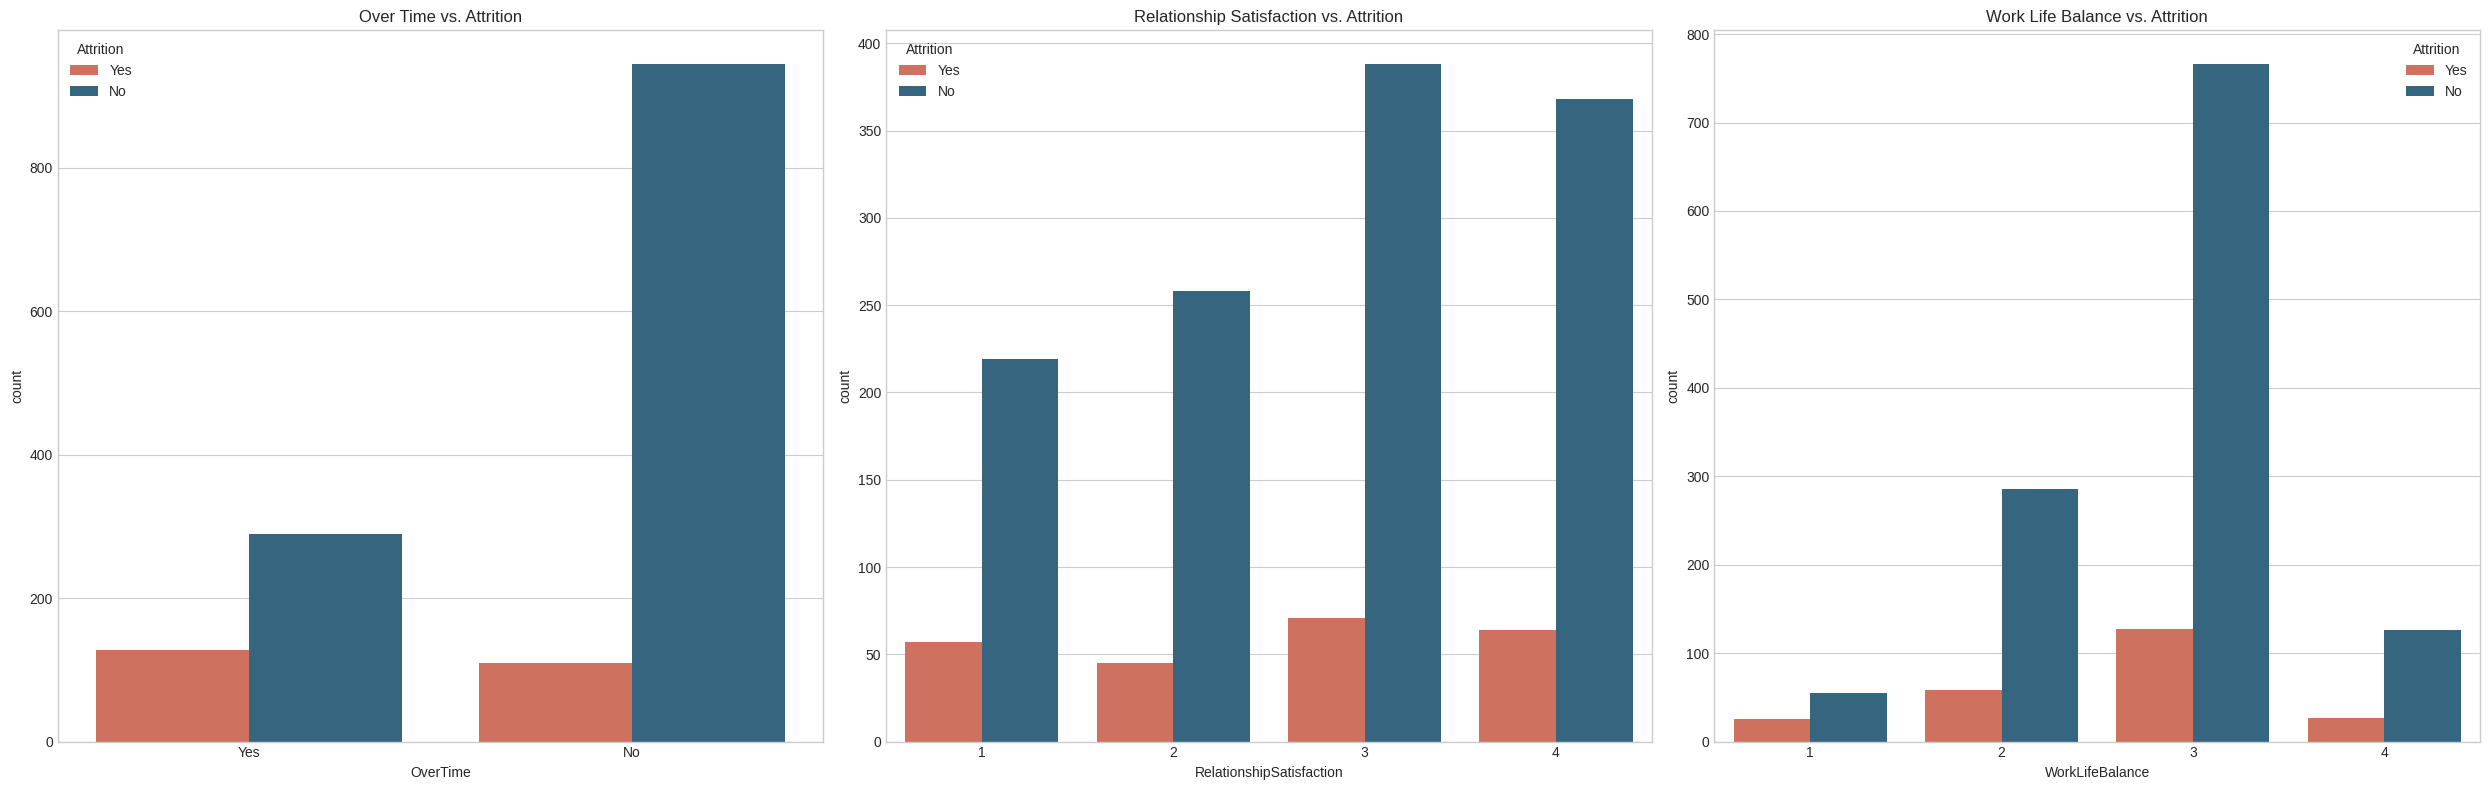

In [ ]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
palette = {"Yes": "#e2644c", "No": "#2a6a8b"}
# Plot 1: Over Time vs. Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df, ax=axes[0],palette=palette)
axes[0].set_title('Over Time vs. Attrition')

# Plot 2: Relationship Satisfaction vs. Attrition
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, ax=axes[1],palette=palette)
axes[1].set_title('Relationship Satisfaction vs. Attrition')

# Plot 3: Work Life Balance vs. Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, ax=axes[2],palette=palette)
axes[2].set_title('Work Life Balance vs. Attrition')

plt.tight_layout()
plt.show()

RelationshipSatisfaction  และ WorkLifeBalance Rate จาก 1-4 โดย 4 คือดีที่สุด

Insights:


*   จากกราฟ Monthly Income Distribution by Attrition Status(Right-Skewed Distribution) แสดงให้เห็นว่าพนักงานส่วนใหญ่อยู่ในตำแหน่งที่มีรายได้ต่ำ โดยมีเพียงส่วนน้อยที่ได้รับค่าตอบแทนสูง


*   โดยรวมแล้วกราฟแสดงให้เห็นว่ารายได้ต่อเดือนอาจเป็นปัจจัยสำคัญในการลาออกโดยระดับรายได้ที่ต่ำลงอาจส่งผลให้มีอัตราการลาออกของพนักงานสูงขึ้น


*   อัตราการลาออกของพนักงานชายอยู่ที่ประมาณ 17% เมื่อเทียบกับพนักงานหญิงที่มีอัตราการลาออก 14.7% ซึ่งชี้ให้เห็นว่าความไม่เท่าเทียมทางเพศไม่ใช่ปัจจัยสำคัญที่ส่งผลต่อการลาออก
*   พนักงานส่วนใหญ่อยู่ในระดับตำแหน่งที่ 1 และ 2 แต่อัตราการลาออกนั้นเทียบเท่ากันในทุกระดับตำแหน่งแสดงให้เห็นถึงความจำเป็นในการพัฒนากลยุทธ์การรักษาพนักงานในภาพรวม
* ฝ่ายวิจัยและพัฒนาโดยเฉพาะนักวิจัยมีความพึงพอใจในงานสูงที่สุด ในขณะที่ฝ่ายทรัพยากรบุคคลมีความพึงพอใจต่ำที่สุด ส่วนฝ่ายขายพบว่ามีระดับความพึงพอใจปานกลางถึงสูง ฝ่ายวิจัยและพัฒนามีจำนวนพนักงานที่ยังทำงานต่อโดยไม่ลาออกสูงที่สุด ในขณะที่ฝ่ายขายมีอัตราการลาออกสูงที่สุดที่ 20%

*   อัตราการลาออกสูงในกลุ่มพนักงานที่ทำงานกับผู้จัดการคนปัจจุบันน้อยกว่า 3 ปี
เมื่อจำนวนปีที่ทำงานกับผู้จัดการเพิ่มขึ้น อัตราการลาออกจะลดลง แสดงให้เห็นว่าความสัมพันธ์ที่ยาวนานกับผู้จัดการอาจช่วยรักษาพนักงานไว้ได้

*   การลาออกมีแนวโน้มสูงในกลุ่มพนักงานที่ได้รับการขึ้นเงินเดือนน้อย (ประมาณ 11-15%) ซึ่งอาจบ่งชี้ถึงความไม่พอใจในด้านการเพิ่มค่าตอบแทน
*   พนักงานที่ลาออกส่วนใหญ่ไม่ได้รับการเลื่อนตำแหน่งในช่วงไม่กี่ปีที่ผ่านมา ซึ่งอาจบ่งบอกว่าการขาดการเลื่อนตำแหน่งอาจมีผลต่อการลาออก


*   การลาออกมีแนวโน้มสูงในกลุ่มพนักงานที่มีอายุงานในตำแหน่งปัจจุบันน้อยกว่า 3 ปี เมื่อพนักงานทำงานในตำแหน่งเดียวกันนานขึ้น อัตราการลาออกจะลดลง แสดงให้เห็นว่าความมั่นคงในตำแหน่งและประสบการณ์มีผลต่อการรักษาพนักงาน

# Data Preprocessing - Clean Data

In [ ]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


<h2>Drop irrelevant columns

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['EmployeeNumber', 'EmployeeCount'])
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
# Drop StandardHours due to low variability
df = df.drop(columns=['StandardHours'])

In [ ]:
df = df.drop(columns=['Over18']) # Drop 'Over18' since it has only one unique value

In [ ]:
# Separate numeric and categorical columns
numeric_col = [col for col in df.columns if df[col].dtype != "object"]
categorical_col = [col for col in df.columns if df[col].dtype == "object"]

**Categorical Encoding**¶


```
Mapping : Attrition

Label Encoding : Gender , OverTime

One-hot Encoding : MaritalStatus , BusinessTravel , Department , EducationField , JobRole
```




In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical features
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# One-Hot Encoding for specific categorical features
one_hot_encoded_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
encoder = OneHotEncoder(drop='if_binary',sparse_output=False,handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df[one_hot_encoded_columns])
df.drop(columns=one_hot_encoded_columns,inplace=True)
df[encoder.get_feature_names_out()]=encoded_cols

In [ ]:
# Convert boolean columns to integers
df = df.astype(int)
df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(1470, 50)

<h2> Scaling the data

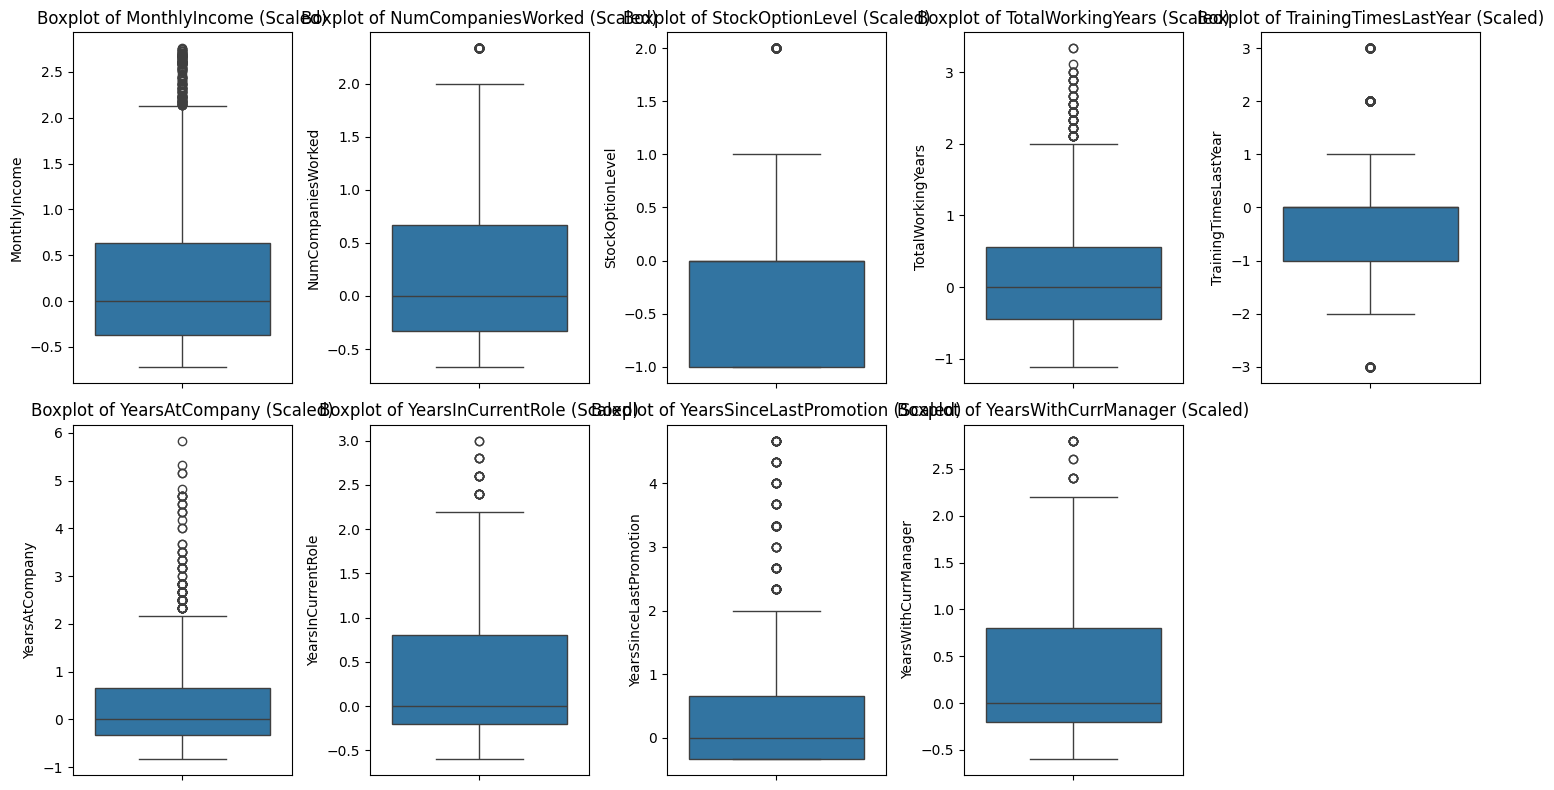

In [ ]:
from sklearn.preprocessing import RobustScaler
# Create a copy of the dataframe
df_robust = df.copy()

# List of features with outliers, excluding 'PerformanceRating'
features_with_outliers = ['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel',
                          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                          'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Robust Scaling for continuous features (excluding 'PerformanceRating')
robust = RobustScaler()
df_robust[features_with_outliers] = robust.fit_transform(df_robust[features_with_outliers])

# Plot box plots for each numeric column to check for outliers after scaling
plt.figure(figsize=(15, 8))
for i, col in enumerate(features_with_outliers, 1):
    plt.subplot(2, (len(features_with_outliers) + 1) // 2, i)
    sns.boxplot(y=df_robust[col])
    plt.title(f"Boxplot of {col} (Scaled)")

# Adjust the space between the subplots
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Outlier detection
features_with_outliers = []
for feature in numeric_col:
    percentile25 = df_robust[feature].quantile(0.25)
    percentile75 = df_robust[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df_robust[(df_robust[feature] > upper_limit) | (df_robust[feature] < lower_limit)]
    proportion_of_outliers = len(outliers) / len(df) * 100
    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Feature: {feature}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Proportion of outliers: {proportion_of_outliers:.2f}%\n")

Feature: MonthlyIncome
Number of outliers: 114
Proportion of outliers: 7.76%

Feature: NumCompaniesWorked
Number of outliers: 52
Proportion of outliers: 3.54%

Feature: PerformanceRating
Number of outliers: 226
Proportion of outliers: 15.37%

Feature: StockOptionLevel
Number of outliers: 85
Proportion of outliers: 5.78%

Feature: TotalWorkingYears
Number of outliers: 63
Proportion of outliers: 4.29%

Feature: TrainingTimesLastYear
Number of outliers: 238
Proportion of outliers: 16.19%

Feature: YearsAtCompany
Number of outliers: 104
Proportion of outliers: 7.07%

Feature: YearsInCurrentRole
Number of outliers: 21
Proportion of outliers: 1.43%

Feature: YearsSinceLastPromotion
Number of outliers: 107
Proportion of outliers: 7.28%

Feature: YearsWithCurrManager
Number of outliers: 14
Proportion of outliers: 0.95%



In [ ]:
# Handling outliers by mean
df_mean=df.copy()
def replace_outliers_with_mean(df, numeric_col):
    for col in numeric_col:
        # Calculate the 25th and 75th percentiles (Q1 and Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Determine the upper and lower limits for outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Calculate the mean of the column
        mean_value = df[col].mean()

        # Replace outliers with the mean
        df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), mean_value, df[col])

    return df
df_mean= replace_outliers_with_mean(df_mean, numeric_col)

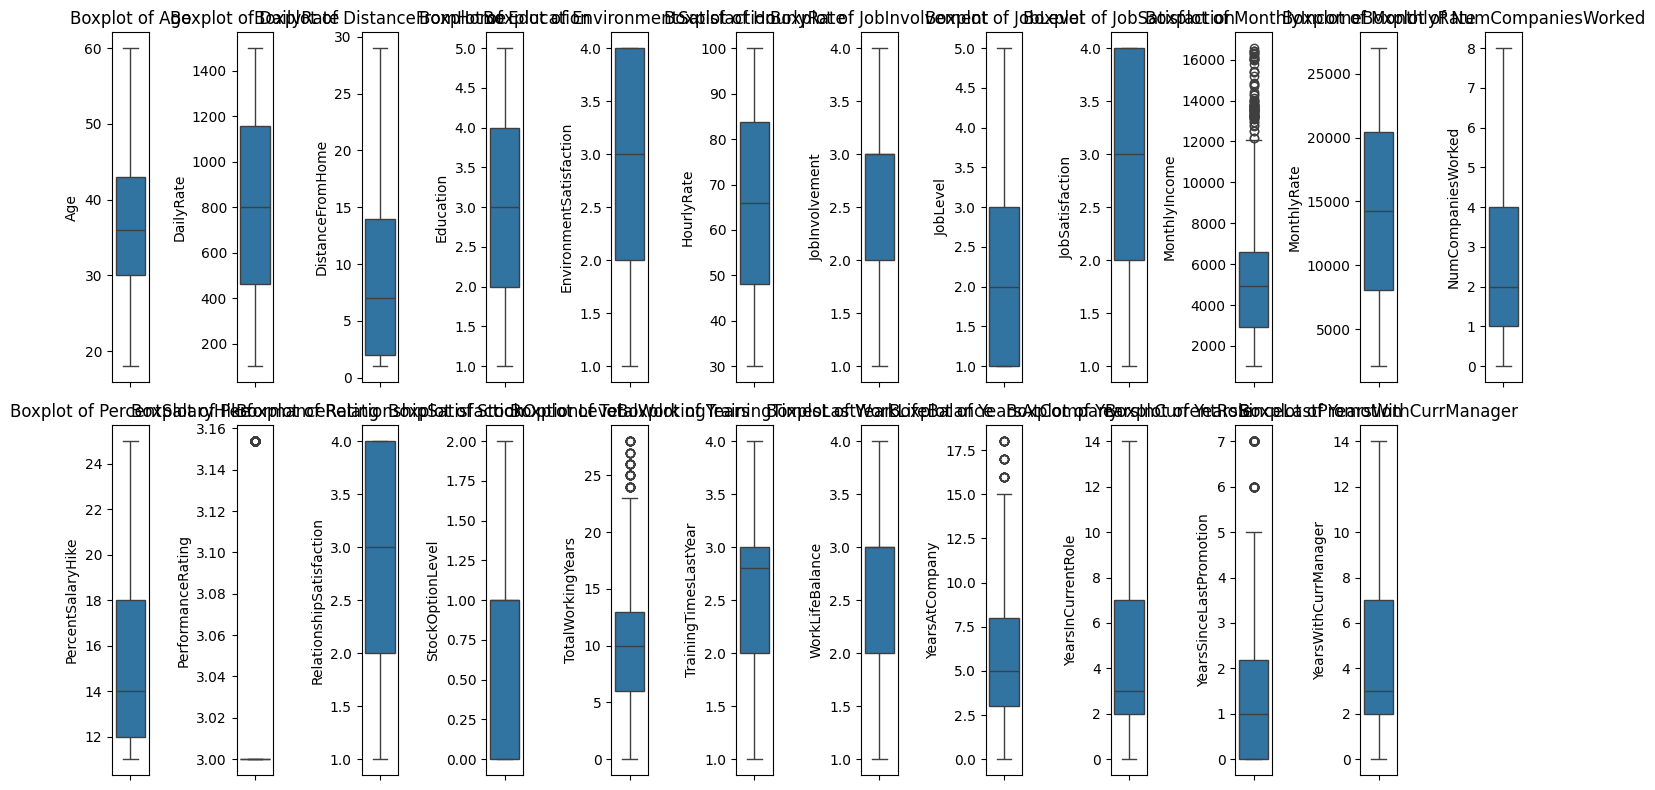

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(2, (len(numeric_col) + 1) // 2, i)
    sns.boxplot(y=df_mean[col])
    plt.title(f'Boxplot of {col}')

# Adjust the space between the subplots
plt.subplots_adjust(hspace=1)  # Increase this value to make the gap larger
plt.tight_layout()
plt.show()

In [ ]:
# Handling outliers by median
df_median=df_robust.copy()
def replace_outliers_with_mean(df, numeric_col):
    for col in numeric_col:
        # Calculate the 25th and 75th percentiles (Q1 and Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Determine the upper and lower limits for outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Calculate the median of the column
        median_value = df[col].median()

        # Replace outliers with the mean
        df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), median_value, df[col])

    return df
df_median= replace_outliers_with_mean(df_median, numeric_col)

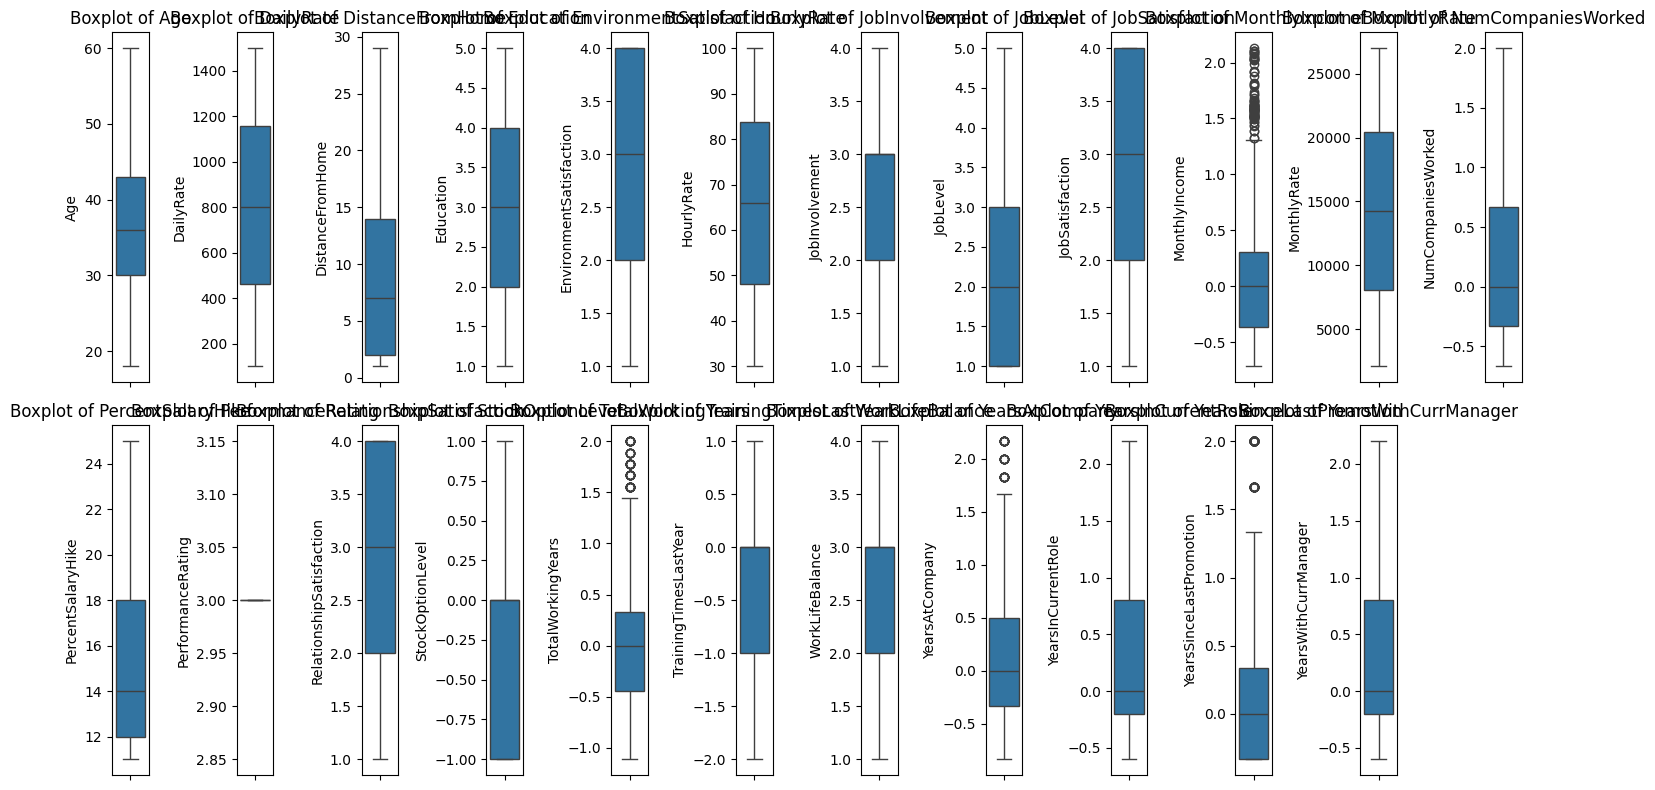

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(2, (len(numeric_col) + 1) // 2, i)
    sns.boxplot(y=df_median[col])
    plt.title(f'Boxplot of {col}')

# Adjust the space between the subplots
plt.subplots_adjust(hspace=1)  # Increase this value to make the gap larger
plt.tight_layout()
plt.show()

In [ ]:
# Handling outliers by capping
df_cap = df_robust.copy()
for col in numeric_col:
    lower_bound = df_cap[col].quantile(0.05)
    upper_bound = df_cap[col].quantile(0.95)
    df_cap[col] = np.where(df_cap[col] < lower_bound, lower_bound, df_cap[col])
    df_cap[col] = np.where(df_cap[col] > upper_bound, upper_bound, df_cap[col])

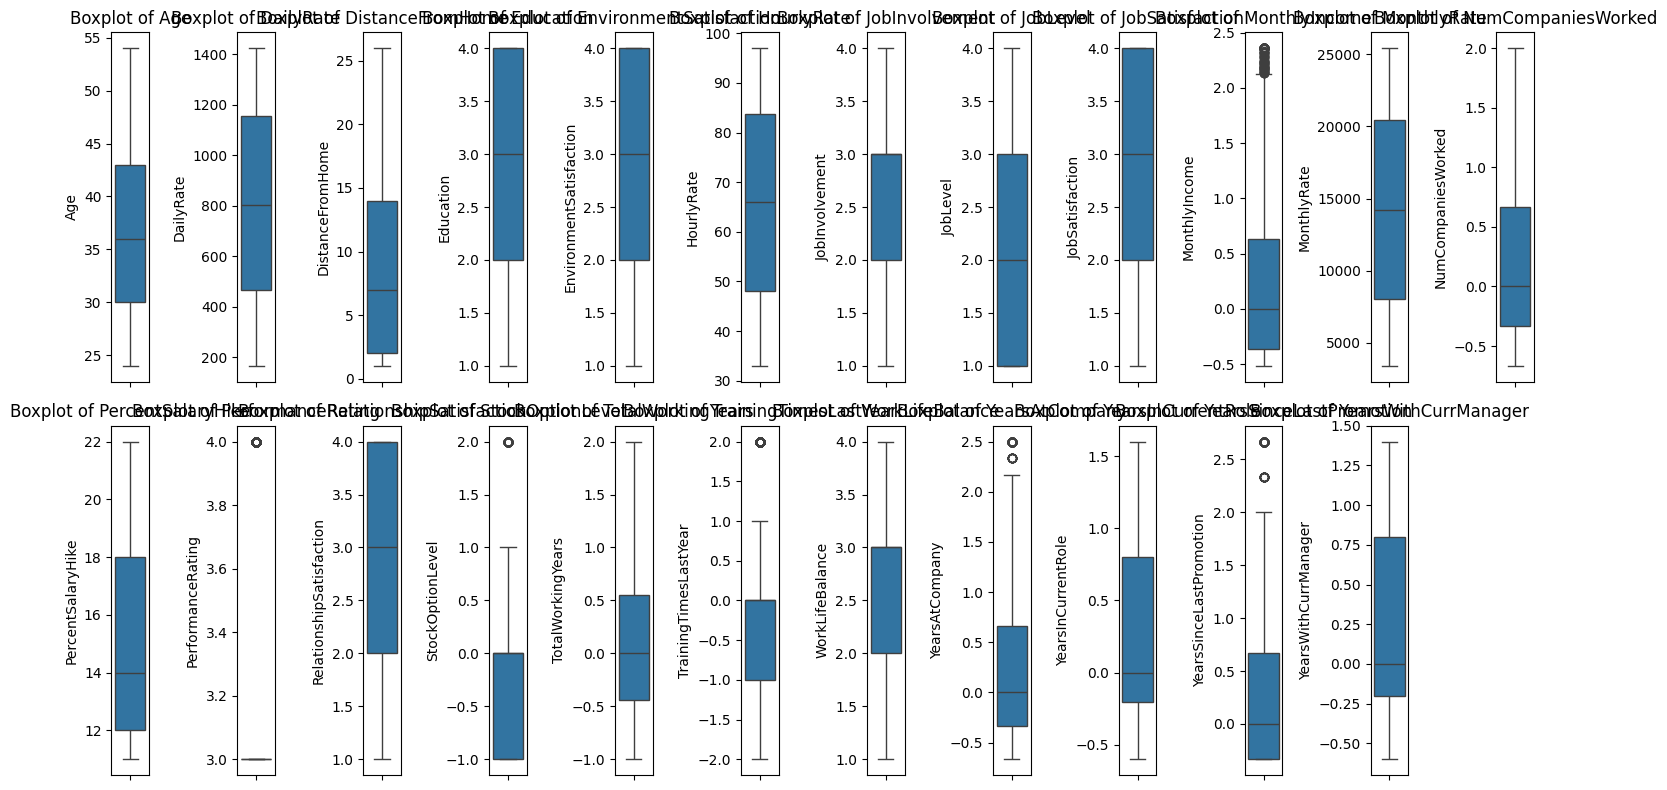

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(2, (len(numeric_col) + 1) // 2, i)
    sns.boxplot(y=df_cap[col])
    plt.title(f'Boxplot of {col}')

# Adjust the space between the subplots
plt.subplots_adjust(hspace=1)  # Increase this value to make the gap larger
plt.tight_layout()
plt.show()

Outliner:
  

*   เนื่องจากข้อมูลนี้จะใช้ RobustScaler ทำให้โดยปกติแล้วไม่จำเป็นต้องทำ capping กับ outliers ภายหลัง เนื่องจาก RobustScaler ลดผลกระทบของค่าสุดขีดโดยการ scaling ให้ต่ำลงซึ่งโดยปกติแล้วเพียงพอสำหรับการจัดการกับ outliers และการทำ capping เพิ่มเติมอาจไม่เกิดประโยชน์อย่างมีนัยสำคัญ
*   การoutlinerที่โชว์ในรูปแบบต่างๆมีไว้เพื่อให้ผู้จัดทำเพื่อทดลองความเป็นไปได้ในวิธีการอื่นๆเท่านั้น



  

Correlation Matrix คือ ตารางที่ใช้แสดงความสัมพันธ์ระหว่างตัวแปรหลายตัว โดยมีค่าที่บอกถึงความสัมพันธ์ระหว่างตัวแปรต่าง ๆ ในรูปแบบของค่าความสัมพันธ์ (correlation coefficient) ซึ่งเป็นค่าที่อยู่ในช่วง -1 ถึง 1


*   ค่าความสัมพันธ์ 1 เมื่อหนึ่งตัวแปรเพิ่มขึ้น ตัวแปรอีกตัวก็จะเพิ่มขึ้นตาม
*   ค่าความสัมพันธ์ -1 เมื่อหนึ่งตัวแปรเพิ่มขึ้น ตัวแปรอีกตัวจะลดลง



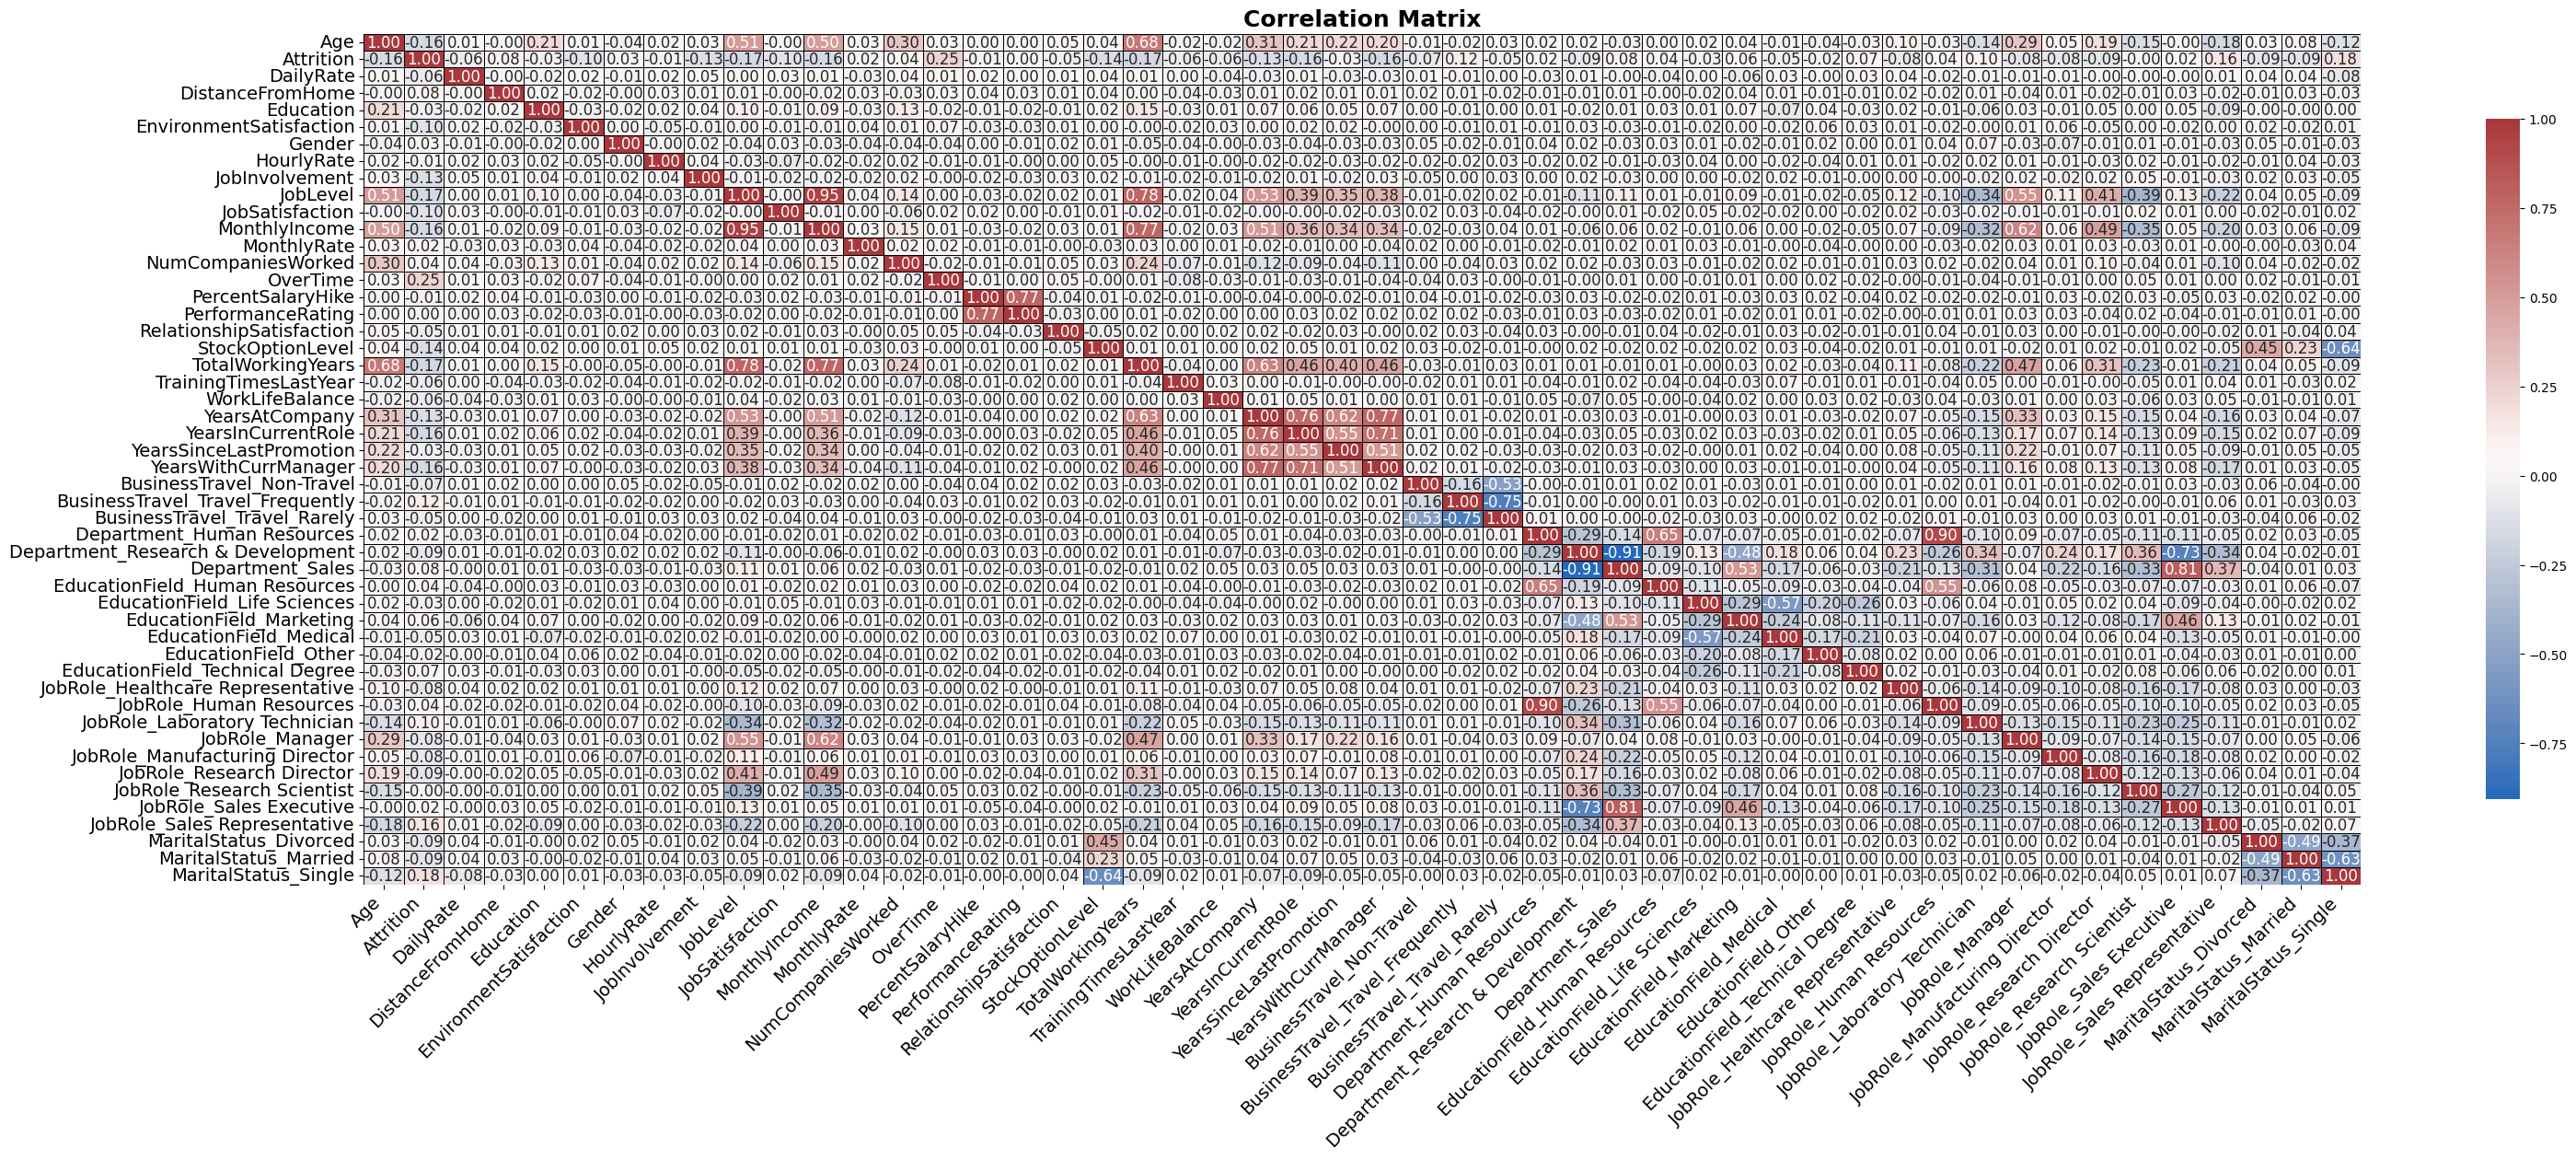

In [ ]:
# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(35, 12))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap=sns.color_palette("vlag", as_cmap=True),
    linewidths=0.5,
    linecolor='black',
    annot_kws={"size": 12},
    cbar_kws={"shrink": 0.8},
)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.title('Correlation Matrix', fontsize=18, weight='bold')
plt.show()

In [ ]:
# Set the correlation threshold
threshold = 0.8

# Find pairs of features with correlation above the threshold
high_corr_features = []
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, col]) > threshold and col != row:
            high_corr_features.append((row, col, corr_matrix.loc[row, col]))

# Display highly correlated pairs
for feature_pair in high_corr_features:
    print(f"Features {feature_pair[0]} and {feature_pair[1]} have a correlation of {feature_pair[2]:.2f}")

Features MonthlyIncome and JobLevel have a correlation of 0.95
Features JobLevel and MonthlyIncome have a correlation of 0.95
Features JobRole_Human Resources and Department_Human Resources have a correlation of 0.90
Features Department_Sales and Department_Research & Development have a correlation of -0.91
Features Department_Research & Development and Department_Sales have a correlation of -0.91
Features JobRole_Sales Executive and Department_Sales have a correlation of 0.81
Features Department_Human Resources and JobRole_Human Resources have a correlation of 0.90
Features Department_Sales and JobRole_Sales Executive have a correlation of 0.81


Feature engineering based on correlations

In [ ]:
# Create a new feature: Income per Job Level
df['IncomePerJobLevel'] = df['MonthlyIncome'] / df['JobLevel']
# Create a new feature that represents department preference
df['SalesVsResearch'] = df['Department_Sales'] - df['Department_Research & Development']
# Create a new feature: Sales Executive Influence
df['SalesExecInfluence'] = df['JobRole_Sales Executive'] * df['Department_Sales']

IncomePerJobLevel: Ratio of income to job level.

SalesVsResearch: Difference between Sales and Research & Development departments.

SalesExecInfluence: Influence of being a Sales Executive within the Sales department.





*   การจัดการ correlations ในรูปแบบนี้จะช่วยในการ ลดปัญหา Multicollinearity เช่น การสร้างฟีเจอร์ใหม่อย่าง IncomePerJobLevel (รายได้หารด้วยระดับงาน) จะช่วยลดความสัมพันธ์ระหว่าง MonthlyIncome และ JobLevel แทนที่จะใช้ทั้งสองฟีเจอร์ที่อาจมีความสัมพันธ์สูงกันในโมเดล และทำให้มี Input ตีความได้ง่ายขึ้น



# Modeling

data imbalanced ฉะนั้นจะใช้วิธี oversampling technique "SMOTE"

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [ ]:
from imblearn.over_sampling import SMOTE
# Handle class imbalance using SMOTE
X = df.drop(columns=['Attrition'])
y = df['Attrition']
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)


In [ ]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,IncomePerJobLevel,SalesVsResearch,SalesExecInfluence
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2996.500000,1,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2565.000000,-1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2090.000000,-1,0
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2909.000000,-1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3468.000000,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1285.500000,-1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3330.333333,-1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3071.000000,-1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2695.000000,1,1


In [ ]:
result = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

# Define the models to be used for classification
models = {
    'LR': LogisticRegression(random_state=42),  # Logistic Regression
    'KNN': KNeighborsClassifier(),              # K-Nearest Neighbors
    'DT': DecisionTreeClassifier(random_state=42),  # Decision Tree
    'RF': RandomForestClassifier(random_state=42),  # Random Forest
}

# Define the scaler to be used for feature scaling
scaler = RobustScaler()

# Define the hyperparameter grids for each model for tuning
model_params = {
    'LR': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Regularization parameter for Logistic Regression
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],        # Number of neighbors
        'weights': ['uniform', 'distance'],     # Weight function used in prediction
        'metric': ['euclidean', 'manhattan']    # Distance metric to use for the tree
    },
    'DT': {
        'max_depth': [3, 5, 7],                 # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
        'min_impurity_decrease': [0, 0.001, 0.01]  # Minimum impurity decrease required for a split
    },
    'RF': {
        'n_estimators': [100, 200, 500],        # Number of trees in the forest
        'max_features': [1, 2, 3],              # Number of features to consider when looking for the best split
        'max_depth': [2, 5, 10],                # Maximum depth of the trees
        'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 5, 10]          # Minimum number of samples required to be at a leaf node
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,auc,classification_report

def model_eval(df_results, model, params, X_train, y_train, X_test, y_test, cluster):
    y_preds = {}
    y_preds_prob = {}

    # Scale the data using RobustScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform grid search with cross-validation
    grid = GridSearchCV(models[model], params, cv=3, n_jobs=-1, scoring='f1_weighted', verbose=2)
    grid.fit(X_train_scaled, y_train)

    # Get predictions and predicted probabilities
    y_pred = grid.best_estimator_.predict(X_test_scaled)
    y_preds['RobustScaler'] = y_pred

    y_pred_prob = grid.predict_proba(X_test_scaled)[:, 1]
    y_preds_prob['RobustScaler'] = y_pred_prob

    # Retrieve the best parameters and scores
    best_param = grid.best_params_
    train_accuracy = grid.best_score_
    test_accuracy = grid.score(X_test_scaled, y_test)

    # Calculate ROC AUC and threshold
    roc_val = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    threshold = thresholds[np.argmax(tpr - fpr)]

    # Plot ROC curve if cluster is provided
    if cluster is not None:
        roc_auc = auc(fpr, tpr)
        print(f"ROC for RobustScaler on the test dataset: {roc_auc:.1%}")
        plt.plot(fpr, tpr, label=f"RobustScaler Test AUC = {roc_auc:.2f}")
        plt.legend(loc=4)
        plt.show()

    # Print the classification report
    print(classification_report(y_test, y_preds['RobustScaler']))

    # Append results to the dataframe
    df_results.append({
        'Model': model,
        'Scaler': 'RobustScaler',
        'Best Params': best_param,
        'Train Accuracy': round(train_accuracy * 100, 1),
        'Test Accuracy': round(test_accuracy * 100, 1),
        'f1-score': round(f1_score(y_test, y_pred, average='macro') * 100, 1),
        'Precision': round(precision_score(y_test, y_pred) * 100, 1),
        'Recall': round(recall_score(y_test, y_pred) * 100, 1),
        'ROC AUC': round(roc_val * 100, 1),
    })

    return df_results, y_preds



1. Logistic Regression



In [ ]:
result = []

In [ ]:
_, lr_y_preds = model_eval(result,'LR', model_params['LR'], X_train, y_train, X_test, y_test,None)
df_results = pd.DataFrame(result,)
df_results

Fitting 3 folds for each of 7 candidates, totalling 21 fits
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       247
           1       0.97      0.90      0.93       247

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.93      0.93       494



,Model,Scaler,Best Params,Train Accuracy,Test Accuracy,f1-score,Precision,Recall,ROC AUC
0,LR,RobustScaler,{'C': 100},92.4,93.3,93.3,96.5,89.9,97.0


2. KNN

In [ ]:
_, knn_y_preds = model_eval(result,'KNN', model_params['KNN'], X_train, y_train, X_test, y_test,None)
df_results = pd.DataFrame(result,)
df_results

Fitting 3 folds for each of 20 candidates, totalling 60 fits
              precision    recall  f1-score   support

           0       0.99      0.80      0.88       247
           1       0.83      0.99      0.90       247

    accuracy                           0.89       494
   macro avg       0.91      0.89      0.89       494
weighted avg       0.91      0.89      0.89       494



,Model,Scaler,Best Params,Train Accuracy,Test Accuracy,f1-score,Precision,Recall,ROC AUC
0,LR,RobustScaler,{'C': 100},92.4,93.3,93.3,96.5,89.9,97.0
1,KNN,RobustScaler,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}",88.0,89.4,89.4,83.3,98.8,96.8


3. DecisionTreeClassifier

In [ ]:
_, dt_y_preds = model_eval(result,'DT', model_params['DT'], X_train, y_train, X_test, y_test,None)
df_results = pd.DataFrame(result,)
df_results

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       247
           1       0.85      0.87      0.86       247

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494



,Model,Scaler,Best Params,Train Accuracy,Test Accuracy,f1-score,Precision,Recall,ROC AUC
0,LR,RobustScaler,{'C': 100},92.4,93.3,93.3,96.5,89.9,97.0
1,KNN,RobustScaler,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}",88.0,89.4,89.4,83.3,98.8,96.8
2,DT,RobustScaler,"{'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}",81.8,85.6,85.6,84.6,87.0,87.6


4. RandomForestClassifier

In [ ]:
_, rf_y_preds = model_eval(result,'RF', model_params['RF'], X_train, y_train, X_test, y_test,None)
df_results = pd.DataFrame(result,)
df_results

Fitting 3 folds for each of 243 candidates, totalling 729 fits
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.92      0.89      0.90       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



,Model,Scaler,Best Params,Train Accuracy,Test Accuracy,f1-score,Precision,Recall,ROC AUC
0,LR,RobustScaler,{'C': 100},92.4,93.3,93.3,96.5,89.9,97.0
1,KNN,RobustScaler,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}",88.0,89.4,89.4,83.3,98.8,96.8
2,DT,RobustScaler,"{'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}",81.8,85.6,85.6,84.6,87.0,87.6
3,RF,RobustScaler,"{'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}",91.5,90.3,90.3,91.6,88.7,95.9


Insight:
ค่าในตาราง
*   Model : ชื่อของโมเดลที่ใช้สำหรับการประเมิน
*   Scaler : ระบุเทคนิคการสเกลที่นำมาใช้กับข้อมูล  
*   Best Params : พารามิเตอร์ที่ดีที่สุดที่พบสำหรับการ  Train
*   Train Accuracy : คะแนนความแม่นยำของ Train
*   Test Accuracy : คะแนนความแม่นยำของ Test
*   f1-score : ค่าเฉลี่ยแบบ harmonic mean ระหว่าง precision และ recall
*   Precision : ค่าความแม่นยำ
Precision = TP/(TP+FP)
*   Recall : Recall = TP/(TP+FN)
*   ROC AUC :  คะแนนพื้นที่ใต้กราฟ ROC (Receiver Operating Characteristic)


จากการทดลองได้พบว่าเมื่อใช้ scaling ตัวเดียวกันคือ   Robus scaling Logistic Regression  นั้นได้ค่าความแม่นยำดีที่สุดในทั้งหมด 4 วิธีที่เลือกมาใช้งาน โดยมีค่าความแม่นยำในแต่ละตัววัดที่สูงกว่าตัวอื่นๆ ยกเว้นแค่ ค่า Recall ที่ตำ่กว่า KNN




